<a href="https://colab.research.google.com/github/farhad06/For-Practics/blob/main/Linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/CO2 Emissions_Canada.csv")

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.shape

(7385, 12)

In [5]:
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [6]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [7]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [8]:
data=df[['Engine Size(L)','Cylinders','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]
data.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [9]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,10.975071,250.584699
std,1.354170,1.828307,2.892506,58.512679
min,0.900000,3.000000,4.100000,96.000000
25%,2.000000,4.000000,8.900000,208.000000
50%,3.000000,6.000000,10.600000,246.000000
75%,3.700000,6.000000,12.600000,288.000000
max,8.400000,16.000000,26.100000,522.000000


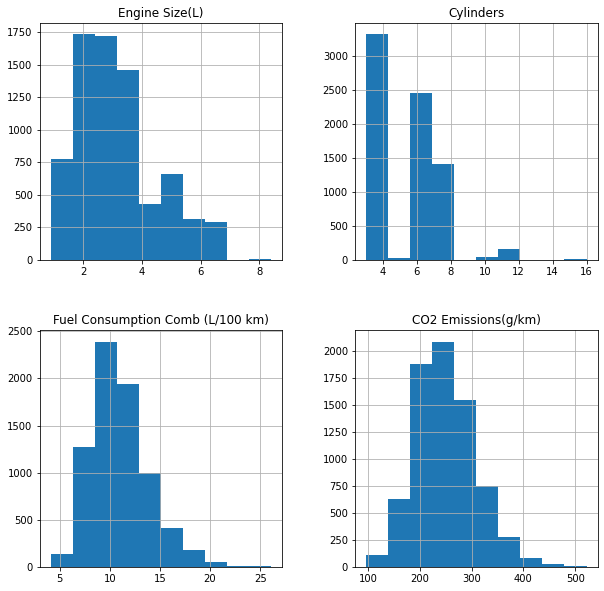

In [10]:
data.hist(figsize=(10,10))
plt.show()

In [11]:
##Split the dataset
train=data[:(int((len(data)*0.8)))]
test=data[(int((len(data)*0.8))):]
print('Shape of Train Data: ',train.shape)
print('Shape of Test Data: ',test.shape)
print("Shape of Original Data",data.shape)

Shape of Train Data:  (5908, 4)
Shape of Test Data:  (1477, 4)
Shape of Original Data (7385, 4)


In [12]:
emission=data['CO2 Emissions(g/km)']
sum_emmision=emission.sum()
num_cars=len(emission)
avg_price1=sum_emmision/num_cars
mean_price1=emission.mean()
print("Avg. of Emision Rate is: ",avg_price1)
print("Mean of Emision Rate is: ",mean_price1)

Avg. of Emision Rate is:  250.58469871360867
Mean of Emision Rate is:  250.58469871360867


In [13]:
X=data.drop('CO2 Emissions(g/km)',axis=1)
y=data['CO2 Emissions(g/km)']

In [14]:
X.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km)
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6


In [15]:
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2 Emissions(g/km), dtype: int64

In [16]:
def simple_linear_regression(input_feature,output):
  X=input_feature
  y=output
  n=len(X)
  X_mean=X.mean()
  y_mean=y.mean()
  sum_of_Xy=(X*y).sum()
  yx=(y.sum()*X.sum())/n
  sum_of_XX=(X*X).sum()
  xx=(X.sum()*X.sum())/n
  slope=(sum_of_Xy-yx)/sum_of_XX-xx
  intercept=y_mean-slope*X_mean
  return(intercept,slope)


In [21]:
data.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)',
       'CO2 Emissions(g/km)'],
      dtype='object')

In [23]:
co2_intercept,co2_slope=simple_linear_regression(train['Engine Size(L)'],train['CO2 Emissions(g/km)'])
print("Intercept: ",co2_intercept);print("Slope is: ",co2_slope)

Intercept:  191619.8773234753
Slope is:  -60031.69130682518


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [19]:
model.fit(X_train,y_train)

LinearRegression()

In [20]:
model.score(X_test,y_test)

0.8765077983667704